<a href="https://colab.research.google.com/github/jadhav-prathamesh/Project/blob/main/Restaurant_Review_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Review Classification

# A NLP Project (Natural Learning Process)

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t',quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')# Removes -ing or verbing of the word

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
corpus = [] # this word contains processed reviews
lemma = WordNetLemmatizer()
all_stop = stopwords.words('english')
all_stop.remove('not')
for i in range(0,1000):
    review = df.iloc[i,0]
    review = re.sub('[^a-zA-Z]',' ',review)
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in all_stop]
    review = ' '.join(review)
    corpus.append(review)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(corpus)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

In [ ]:
# Converting above data into numeric model
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x = vector.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [ ]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.05, random_state = 0)


In [ ]:
# Importing and training the RFC
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=7)
classifier.fit(x_tr,y_tr)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=7)

In [ ]:
# Predicting the output and checking the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(x_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)
print(cm)


0.82
[[27  1]
 [ 8 14]]


In [ ]:
!pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 944.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 2.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 2.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 3.

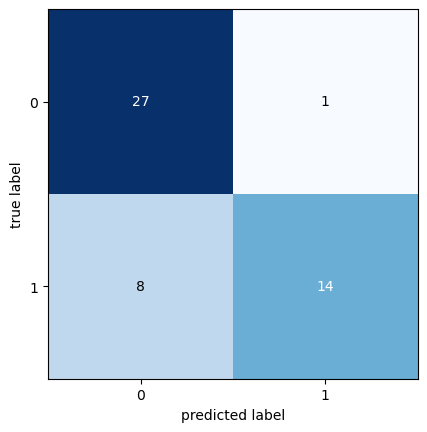

In [ ]:
# Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)# Providing the variable used to store the confusion matrix
plt.show()


In [ ]:
y_list = []
inp = input('Enter your review:')
y_list.append(inp)
y_vect = vector.transform(y_list)
y_pr = classifier.predict(y_vect)[0]
print(y_pr)
if y_pr==0:
    print('Bad Review, the user did not like the restraunt')
else :
    print('Good Review, the user liked the restraunt')

Enter your review:hair
0
Bad Review, the user did not like the restraunt
